# CIFAR10 Dataset

0. cifar10 이미지 데이터셋을 다운로드하고, 훈련/검증/테스트 셋으로 분리하세요.
cifar10 데이터셋은 32x32 크기의 컬러 이미지 60,000개와 10개의 클래스로 이루어져 있습니다.

1. 100개의 뉴런을 가진 은닉층 20개로 DNN(심층 신경망)을 만드세요.
ELU 활성화 함수(activation)와 He 커널 초기화(kernel_initializer)를 사용하세요.

2. Nadam optimizer와 조기 종료(EarlyStopping)을 사용하여 cifar10 데이터 셋으로 신경망을 훈련하세요.
optimizer의 학습률은 5e-5으로 설정하세요.

3. 배치 정규화(BatchNormalization)을 추가하고 위 모델과 비교하세요. 

> Hint
```
model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
```

4. 100개의 뉴런을 가진 은닉층 20개로 DNN(심층 신경망)을 만드세요. SELU 활성화 함수(activation)와 르쿤 정규분포(lecun_normal) 커널 초기화(kernel_initializer)를 사용하세요.
입력 특성들(훈련 셋, 검증 셋, 테스트 셋)은 정규화(StandardScaler)를 사용하세요.

## Imports

0. cifar10 이미지 데이터셋을 다운로드하고, 훈련/검증/테스트 셋으로 분리하세요.
cifar10 데이터셋은 32x32 크기의 컬러 이미지 60,000개와 10개의 클래스로 이루어져 있습니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate 

from sklearn.datasets import load_sample_image  
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train_full.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
y_train_full.shape, y_test.shape

((50000, 1), (10000, 1))

In [10]:
np.min(x_train_full), np.max(x_train_full)

(0, 255)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  stratify=y_train_full,
                                                  test_size=0.1,
                                                  random_state=42)

In [12]:
x_train.shape, x_val.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

In [13]:
y_train.shape, y_val.shape

((45000, 1), (5000, 1))

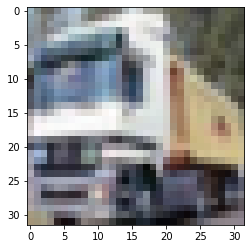

In [37]:
plt.imshow(x_train_full[1], cmap=plt.cm.binary)
plt.show()

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500]))

In [26]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

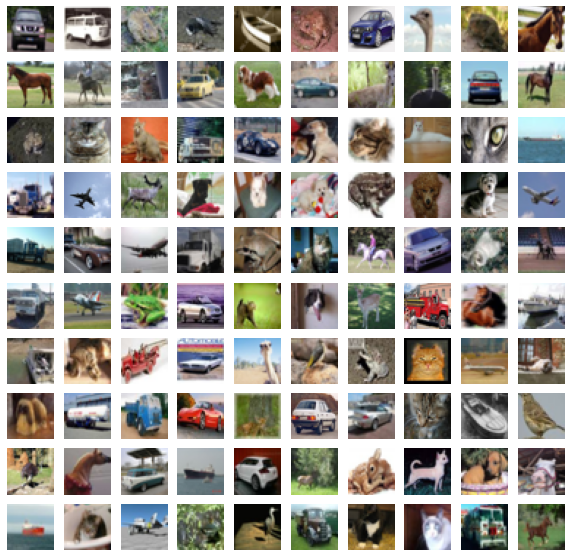

In [25]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        ax[i, j].imshow(x_train[idx], cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

## DNN

1. 100개의 뉴런을 가진 은닉층 20개로 DNN(심층 신경망)을 만드세요.
ELU 활성화 함수(activation)와 He 커널 초기화(kernel_initializer)를 사용하세요.

2. Nadam optimizer와 조기 종료(EarlyStopping)을 사용하여 cifar10 데이터 셋으로 신경망을 훈련하세요.
optimizer의 학습률은 5e-5으로 설정하세요.

3. 배치 정규화(BatchNormalization)을 추가하고 위 모델과 비교하세요. 

> Hint
```
model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
```

In [61]:
model = keras.Sequential()
# flatten layer 추가
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

# 20개 hidden layer
for layer in range(100):
    model.add(keras.layers.Dense(units=100, activation='elu', kernel_initializer='he_normal'))

# output layer 
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_63 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_67 (Dense)             (None, 100)              

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Nadam optimizer와 조기 종료(EarlyStopping)을 사용하여 cifar10 데이터 셋으로 신경망을 훈련하세요. optimizer의 학습률은 5e-5으로 설정하세요.

In [57]:
# 모델 compile
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [58]:
model_check = keras.callbacks.ModelCheckpoint(filepath='best_dnn.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [59]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_val, y_val),
                    callbacks=[model_check, early_stop])

Epoch 1/30
1407/1407 [==============================] - 15s 9ms/step - loss: 13.4008 - accuracy: 0.1449 - val_loss: 2.5091 - val_accuracy: 0.1608
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 2.1978 - accuracy: 0.2156 - val_loss: 2.3823 - val_accuracy: 0.2066
Epoch 3/30
1407/1407 [==============================] - 12s 8ms/step - loss: 2.0133 - accuracy: 0.2676 - val_loss: 2.0220 - val_accuracy: 0.2774
Epoch 4/30
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9283 - accuracy: 0.2975 - val_loss: 2.2637 - val_accuracy: 0.2224
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8484 - accuracy: 0.3256 - val_loss: 1.8650 - val_accuracy: 0.3218
Epoch 6/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7952 - accuracy: 0.3439 - val_loss: 1.8597 - val_accuracy: 0.3294
Epoch 7/30
1407/1407 [==============================] - 11s 7ms/step - loss: 1.7501 - accuracy: 0.3615 - val_loss: 1.7662 - val_a

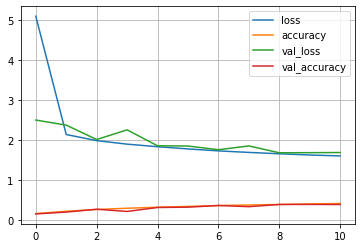

In [60]:
hist = pd.DataFrame(history.history)

hist.plot()
plt.grid()
plt.show()

배치 정규화(BatchNormalization)을 추가하고 위 모델과 비교하세요.

In [63]:
model = keras.Sequential()
# flatten layer 추가
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

# 20개 hidden layer
for layer in range(100):
    model.add(keras.layers.Dense(units=100, activation='elu', kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())

# output layer 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [66]:
# 모델 compile
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [67]:
model_check = keras.callbacks.ModelCheckpoint(filepath='best_dnn.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [68]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_val, y_val),
                    callbacks=[model_check, early_stop])

Epoch 1/30
1407/1407 [==============================] - 180s 101ms/step - loss: 2.6308 - accuracy: 0.0995 - val_loss: 2.4027 - val_accuracy: 0.1110
Epoch 2/30
1407/1407 [==============================] - 137s 98ms/step - loss: 2.3995 - accuracy: 0.0980 - val_loss: 2.3607 - val_accuracy: 0.1076
Epoch 3/30
1407/1407 [==============================] - 139s 98ms/step - loss: 2.3590 - accuracy: 0.1015 - val_loss: 2.3428 - val_accuracy: 0.0940
Epoch 4/30
1407/1407 [==============================] - 138s 98ms/step - loss: 2.3378 - accuracy: 0.1007 - val_loss: 2.3295 - val_accuracy: 0.0952
Epoch 5/30
1407/1407 [==============================] - 130s 92ms/step - loss: 2.3279 - accuracy: 0.0983 - val_loss: 2.3206 - val_accuracy: 0.0986
Epoch 6/30
1407/1407 [==============================] - 133s 95ms/step - loss: 2.3214 - accuracy: 0.1010 - val_loss: 2.3186 - val_accuracy: 0.0926
Epoch 7/30
1407/1407 [==============================] - 135s 96ms/step - loss: 2.3182 - accuracy: 0.0990 - val_loss: 

In [ ]:
# 위 명령 실행이 너무 오래 걸려, 뭔가 잘못된게 아닌가 싶은 생각이 듦
# 중간에 정지 버튼을 누르고 싶은 마음을 꾹 참고 돌려본 후, 더 나은 featuring을 한다는 마음으로 아래로 넘어감

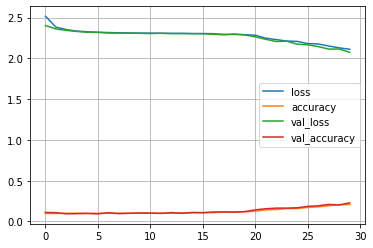

In [69]:
hist = pd.DataFrame(history.history)

hist.plot()
plt.grid()
plt.show()

100개의 뉴런을 가진 은닉층 20개로 DNN(심층 신경망)을 만드세요. SELU 활성화 함수(activation)와 르쿤 정규분포(lecun_normal) 커널 초기화(kernel_initializer)를 사용하세요. 입력 특성들(훈련 셋, 검증 셋, 테스트 셋)은 정규화(StandardScaler)를 사용하세요.

In [70]:
# 입력 특성 정규화(StandardScaler)
img_means = x_train.mean(axis=0, keepdims=True)
img_std = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - img_means) / img_std
x_val_scaled = (x_val - img_means) / img_std
x_test_scaled = (x_test - img_means) / img_std

In [71]:
model = keras.Sequential()
# flatten layer 추가
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

# 20개 hidden layer
for layer in range(20):
    model.add(keras.layers.Dense(units=100, activation='selu', kernel_initializer='lecun_normal'))
    model.add(keras.layers.BatchNormalization())

# output layer 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=5e-5),
              metrics=["accuracy"])

In [74]:
model_check = keras.callbacks.ModelCheckpoint(filepath='best_dnn.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train, epochs=30, 
                    validation_data=(x_val_scaled, y_val),
                    callbacks=[model_check, early_stop])

Epoch 1/30
1407/1407 [==============================] - 39s 23ms/step - loss: 2.1750 - accuracy: 0.2407 - val_loss: 1.7561 - val_accuracy: 0.3760
Epoch 2/30
1407/1407 [==============================] - 30s 22ms/step - loss: 1.7829 - accuracy: 0.3632 - val_loss: 1.6636 - val_accuracy: 0.4116
Epoch 3/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.7094 - accuracy: 0.3916 - val_loss: 1.6075 - val_accuracy: 0.4232
Epoch 4/30
1407/1407 [==============================] - 30s 21ms/step - loss: 1.6595 - accuracy: 0.4100 - val_loss: 1.5721 - val_accuracy: 0.4434
Epoch 5/30
1407/1407 [==============================] - 30s 22ms/step - loss: 1.6096 - accuracy: 0.4307 - val_loss: 1.5300 - val_accuracy: 0.4594
Epoch 6/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.5639 - accuracy: 0.4412 - val_loss: 1.5142 - val_accuracy: 0.4654
Epoch 7/30
1407/1407 [==============================] - 31s 22ms/step - loss: 1.5361 - accuracy: 0.4546 - val_loss: 1.4771 -

In [75]:
model = keras.models.load_model('best_dnn.h5')
model.evaluate(x_val_scaled, y_val)

157/157 [==============================] - 1s 3ms/step - loss: 1.3864 - accuracy: 0.5194


[1.3863779306411743, 0.5194000005722046]

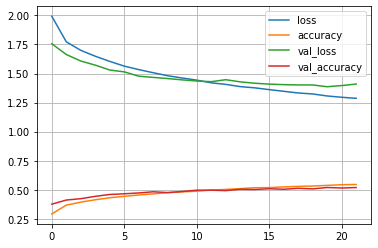

In [76]:
hist = pd.DataFrame(history.history)

hist.plot()
plt.grid()
plt.show()

# MNIST 데이터셋 CNN


아래와 같은 구조로 CNN(합성곱 신경망)을 만드세요.

* Convolution: 64개 필터, 7x7 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Flatten
* 완전연결(Dense)층: 128개 뉴런, ReLU 활성화
* Dropout: 50%
* 완전연결(Dense)층: 64개 뉴런, ReLU 활성화
* Dropout: 50%
* 출력층

Nadam 옵티마이저와 조기종료 콜백을 사용해서 모델을 훈련하세요.

## Imports

In [77]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [78]:
x_train_full.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

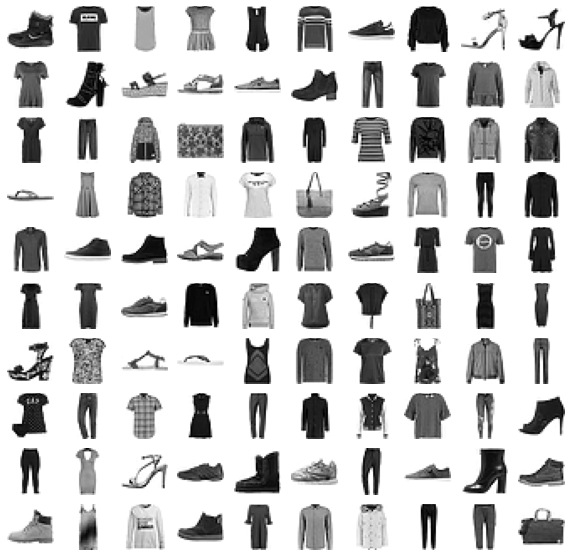

In [120]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        ax[i, j].imshow(x_train_full[idx], cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

In [79]:
x_train_full_scaled = x_train_full.reshape((-1, 28, 28, 1))
x_train_full_scaled.shape

(60000, 28, 28, 1)

In [80]:
x_test_scaled = x_test.reshape((-1, 28, 28, 1))
x_test_scaled.shape

(10000, 28, 28, 1)

In [81]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0, 255)

In [82]:
x_train_full_scaled = x_train_full_scaled / 255
x_test_scaled = x_test_scaled / 255

In [83]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0.0, 1.0)

In [84]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [97]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_scaled, y_train_full,
                                                  test_size=0.1,
                                                  stratify=y_train_full,
                                                  random_state=42)

In [111]:
x_train.shape, y_train.shape

((54000, 28, 28, 1), (54000,))

In [100]:
x_val.shape, y_val.shape

((6000, 28, 28, 1), (6000,))

## CNN

* Convolution: 64개 필터, 7x7 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
* Max Pooling: 2x2 필터
* Flatten
* 완전연결(Dense)층: 128개 뉴런, ReLU 활성화
* Dropout: 50%
* 완전연결(Dense)층: 64개 뉴런, ReLU 활성화
* Dropout: 50%
* 출력층

In [103]:
model = keras.Sequential()

# Conv: 64 filter
model.add(keras.layers.Convolution2D(filters=64, kernel_size=7, padding='same', 
                                     activation='relu', input_shape=(28, 28, 1)))

# Max Pooling: 2x2 filter
model.add(keras.layers.MaxPooling2D())
# Conv: 128 filter
model.add(keras.layers.Convolution2D(filters=128, kernel_size=3, padding='same',
                                     activation='relu'))
# Conv: 128 filter
model.add(keras.layers.Convolution2D(filters=128, kernel_size=3, padding='same',
                                     activation='relu'))

# Max Pooling: 2x2 filter
model.add(keras.layers.MaxPooling2D())
# Conv: 256 filter
model.add(keras.layers.Convolution2D(filters=256, kernel_size=3, padding='same',
                                     activation='relu'))
# Conv: 256 filter
model.add(keras.layers.Convolution2D(filters=256, kernel_size=3, padding='same',
                                     activation='relu'))

# Max Pooling: 2x2 filter
model.add(keras.layers.MaxPooling2D())

# Flatten
model.add(keras.layers.Flatten())
# Dense 128 
model.add(keras.layers.Dense(units=128))
# Dropout 50%
model.add(keras.layers.Dropout(rate=0.5))
# Dense 64
model.add(keras.layers.Dense(units=64))
# Dropout 50%
model.add(keras.layers.Dropout(rate=0.5))

# output layer
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 256)       

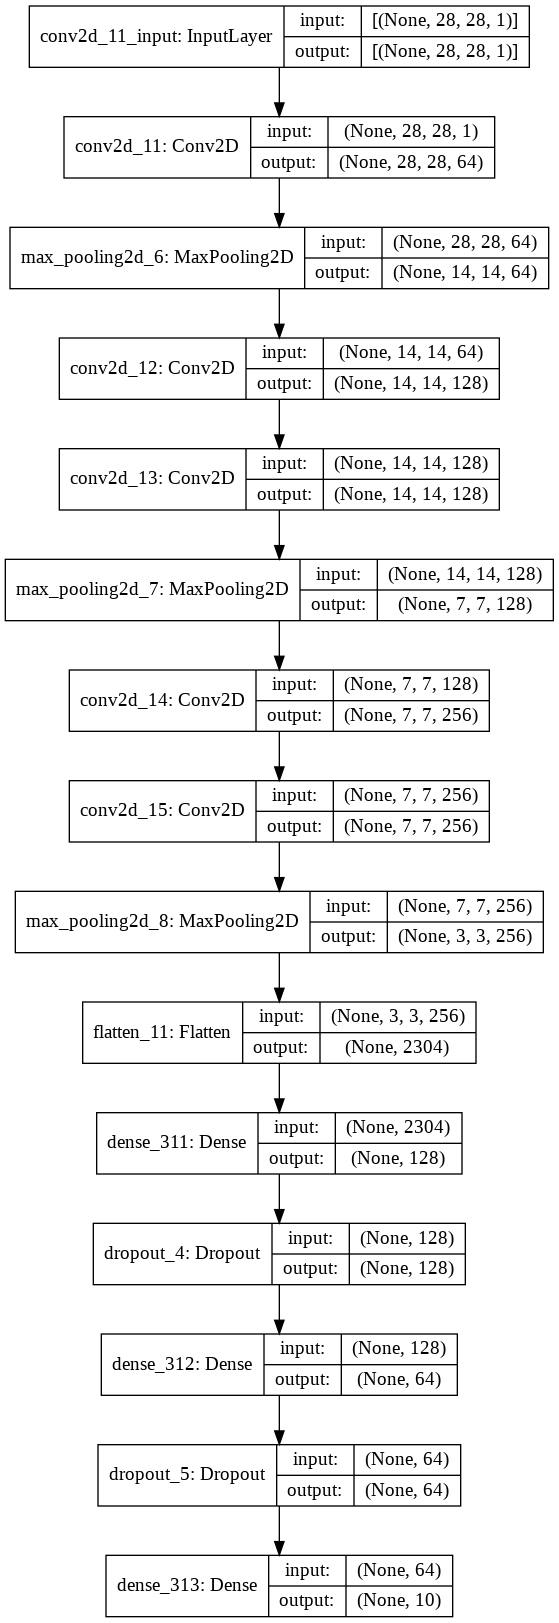

In [105]:
keras.utils.plot_model(model, show_shapes=True)

Nadam 옵티마이저와 조기종료 콜백을 사용해서 모델을 훈련하세요.

In [106]:
model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [107]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_cnn.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stop])

Epoch 1/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.7644 - accuracy: 0.7275 - val_loss: 0.2943 - val_accuracy: 0.8942
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3362 - accuracy: 0.8825 - val_loss: 0.2685 - val_accuracy: 0.9013
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2796 - accuracy: 0.9020 - val_loss: 0.2473 - val_accuracy: 0.9110
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2543 - accuracy: 0.9095 - val_loss: 0.2440 - val_accuracy: 0.9150
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2325 - accuracy: 0.9163 - val_loss: 0.2528 - val_accuracy: 0.9160
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2103 - accuracy: 0.9263 - val_loss: 0.2408 - val_accuracy: 0.9207
Epoch 7/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1948 - accuracy: 0.9323 - val_loss: 0.2482 - val_ac

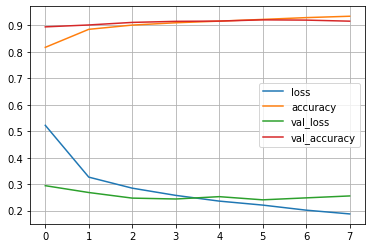

In [109]:
hist = pd.DataFrame(history.history)

hist.plot()
plt.grid()
plt.show()

In [114]:
np.argmin(hist['val_loss'])

5

In [115]:
np.argmax(hist['val_accuracy'])

5

In [121]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2630 - accuracy: 0.9059


[0.26298704743385315, 0.9059000015258789]

In [122]:
y_pred = model.predict(x_test_scaled)
y_pred

array([[5.03904930e-16, 1.44889856e-15, 2.37392944e-17, ...,
        6.56375505e-08, 3.01596232e-13, 9.99999881e-01],
       [7.91187957e-03, 3.91502999e-06, 9.82858419e-01, ...,
        5.28206613e-07, 2.36440360e-06, 1.95549337e-08],
       [1.53403724e-21, 1.00000000e+00, 1.63546241e-20, ...,
        3.83740557e-20, 5.81631361e-21, 2.77814142e-22],
       ...,
       [8.99833676e-24, 7.29324009e-19, 3.14696463e-23, ...,
        1.45426816e-25, 1.00000000e+00, 6.00710132e-22],
       [4.01037622e-16, 1.00000000e+00, 1.49389994e-15, ...,
        2.52325080e-16, 1.09140175e-16, 6.01169847e-18],
       [1.06933829e-03, 4.03987244e-03, 1.00625807e-03, ...,
        4.75335121e-01, 6.00995198e-02, 1.81321412e-01]], dtype=float32)

In [123]:
np.argmax(y_pred, axis=1)

array([9, 2, 1, ..., 8, 1, 7])